In [1]:
import pathlib

data_dir = pathlib.Path('s82j8dh4rr-1')

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_height = 224
img_width = 224

test_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), validation_split=0.1, subset='validation')

Found 3500 files belonging to 10 classes.
Using 350 files for validation.


In [3]:
import tensorflow as tf

model = tf.keras.models.load_model('Model_EfficientNetV2B0-1.h5')

In [4]:
model.evaluate(test_data)

11/11 [==============================] - 5s 281ms/step - loss: 0.0195 - accuracy: 0.9914


[0.019546417519450188, 0.991428554058075]

In [5]:
import numpy as np

predictions = model.predict(test_data)

y_pred = []
y_true = []

for image_batch, label_batch in test_data:
    y_true.append(label_batch)
    preds = model.predict(image_batch)
    y_pred.append(np.argmax(preds, axis = - 1))

true_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 1s 917ms/step


In [6]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels, target_names=['Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi',
                                                                        'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya', 'Seledri', 'Sirih']))

                 precision    recall  f1-score   support

Belimbing Wuluh       1.00      1.00      1.00        38
     Jambu Biji       1.00      0.97      0.99        34
    Jeruk Nipis       1.00      1.00      1.00        30
        Kemangi       1.00      1.00      1.00        36
    Lidah Buaya       0.94      1.00      0.97        31
         Nangka       0.97      1.00      0.99        37
         Pandan       1.00      0.93      0.96        29
         Pepaya       1.00      1.00      1.00        45
        Seledri       1.00      1.00      1.00        39
          Sirih       1.00      1.00      1.00        31

       accuracy                           0.99       350
      macro avg       0.99      0.99      0.99       350
   weighted avg       0.99      0.99      0.99       350



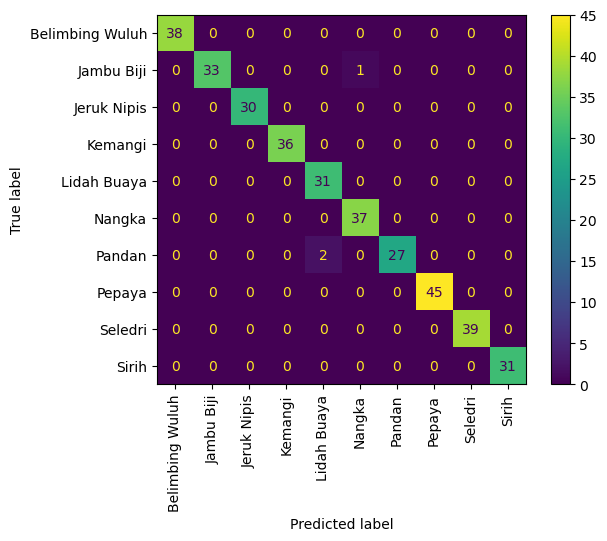

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Belimbing Wuluh', 'Jambu Biji', 'Jeruk Nipis', 'Kemangi',
                                                                        'Lidah Buaya', 'Nangka', 'Pandan', 'Pepaya', 'Seledri', 'Sirih'])
disp.plot(xticks_rotation=90)